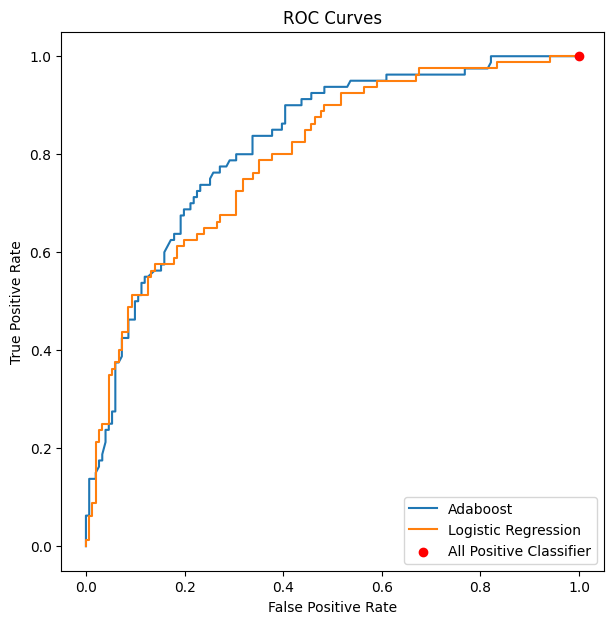

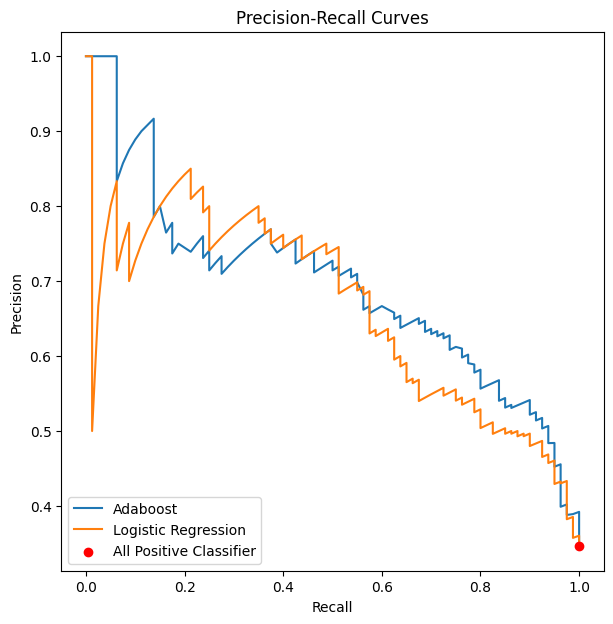

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder

dataset = fetch_openml(data_id=37, as_frame=True)
X = dataset.data
y = dataset.target

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Adaboost classifier
adaboost = AdaBoostClassifier(algorithm='SAMME', random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict_proba(X_test)[:, 1]

# Train Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_pred_adaboost)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)

# Compute PR curves
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_pred_adaboost)
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_pred_log_reg)

# All positive classifier metrics
all_positive_precision = y_test.sum() / len(y_test)
all_positive_recall = 1.0
all_positive_fpr = 1.0
all_positive_tpr = 1.0

# Plotting ROC Curves in one figure
plt.figure(figsize=(7, 7))
plt.plot(fpr_adaboost, tpr_adaboost, label='Adaboost')
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression')
plt.scatter([all_positive_fpr], [all_positive_tpr], color='red', label='All Positive Classifier', zorder=5)
plt.title("ROC Curves")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plotting PR Curves in another figure
plt.figure(figsize=(7, 7))
plt.plot(recall_adaboost, precision_adaboost, label='Adaboost')
plt.plot(recall_log_reg, precision_log_reg, label='Logistic Regression')
plt.scatter([all_positive_recall], [all_positive_precision], color='red', label='All Positive Classifier', zorder=5)
plt.title("Precision-Recall Curves")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.show()
